Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 n

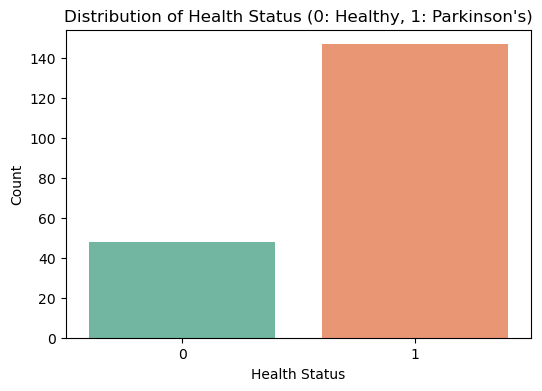


Mean Values of Numeric Features Grouped by Health Status:
        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR        HNR  status  \
status                    ...                                             
0               0.162958  ...     0.028511  0.011483  24.678750     0.0   
1               0.321204  ...     0.053027  0.029211  20.974048     1.0   

            RPDE       DFA   spread1   spread2        D2       PPE  
statu

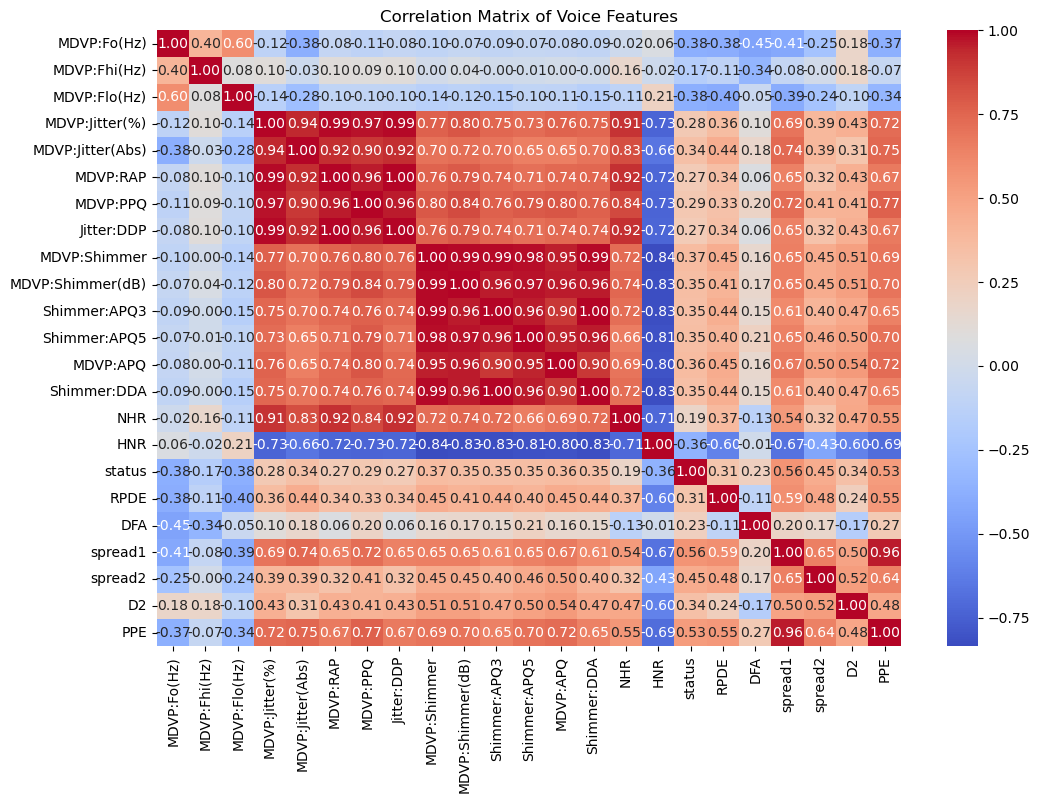

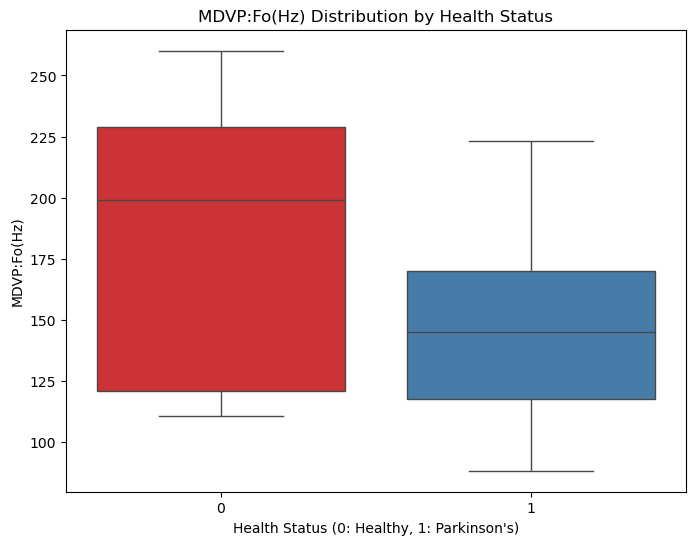

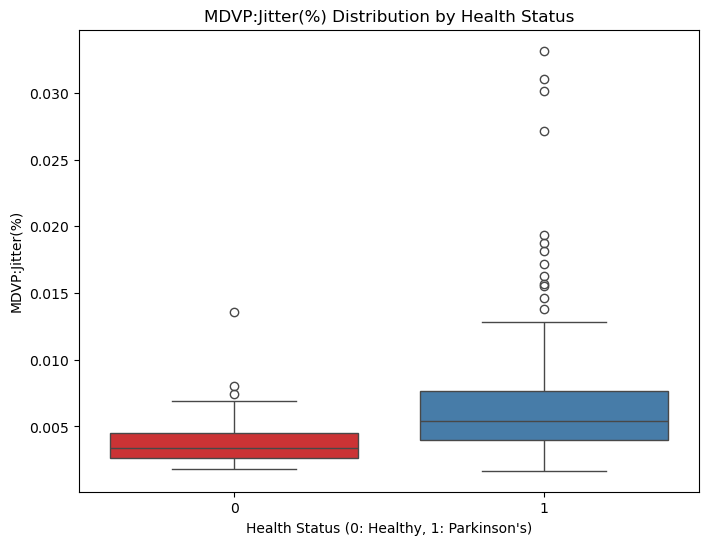

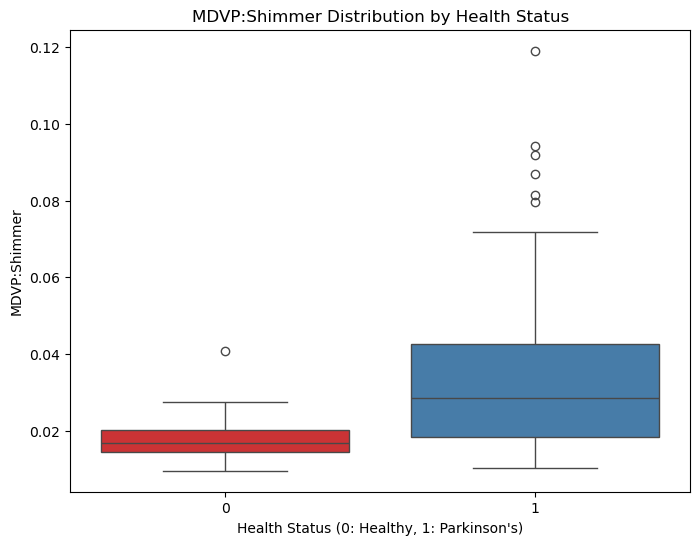

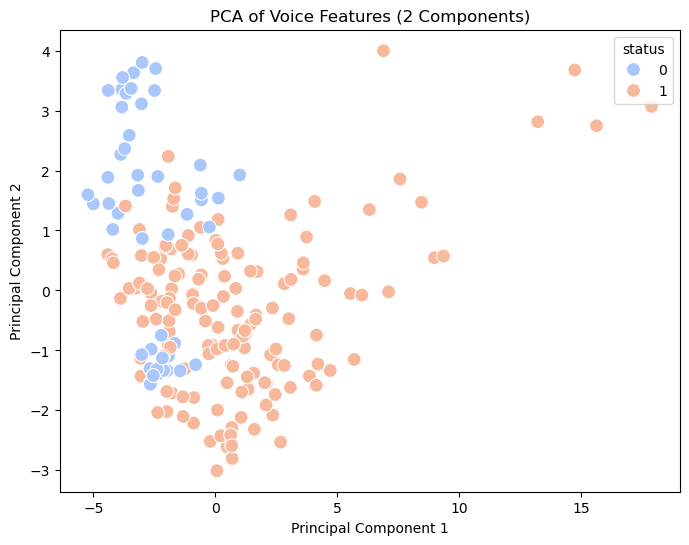

In [15]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
# Ensure that the 'DB_Voice_Features.csv' file is in the same directory or adjust the path accordingly
df = pd.read_csv('DB_Voice_Features.csv')

# Step 1: Basic data exploration to understand the structure of the dataset
print("Dataset Information:")
df.info()  # Overview of data types and missing values
print("\nFirst 5 Records in the Dataset:")
print(df.head())  # Display the first few rows of the dataset
print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())  # Summary statistics for numeric columns

# Step 2: Check for missing values across the dataset
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Step 3: Visualize the distribution of the 'status' column (0 = Healthy, 1 = Parkinson's)
plt.figure(figsize=(6, 4))
sns.countplot(x='status', data=df, hue='status', palette='Set2', legend=False)  # Assign 'status' to 'hue'
plt.title('Distribution of Health Status (0: Healthy, 1: Parkinson\'s)')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()


# Step 4: Statistical summary of the voice features grouped by health status (0 = Healthy, 1 = Parkinson's)
# Here we select only the numeric columns for this summary
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
grouped_stats = df.groupby('status')[numeric_cols].mean()  # Calculate mean for each group (Healthy vs PD)
print("\nMean Values of Numeric Features Grouped by Health Status:")
print(grouped_stats)

# Step 5: Correlation analysis to understand relationships between different voice features
# We exclude non-numeric columns (like 'name') as they are not relevant for correlation analysis
plt.figure(figsize=(12, 8))
numeric_df = df.drop(columns=['name'])  # Drop the 'name' column as it's non-numeric
correlation_matrix = numeric_df.corr()  # Generate the correlation matrix for numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Voice Features')
plt.show()

# Step 6: Visualize key features to observe differences between healthy and Parkinson's patients
# Features such as fundamental frequency (Fo), jitter, and shimmer are critical for analysis
features = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='status', y=feature, data=df, hue='status', palette='Set1', legend=False)  # Assign 'status' to 'hue'
    plt.title(f'{feature} Distribution by Health Status')
    plt.xlabel('Health Status (0: Healthy, 1: Parkinson\'s)')
    plt.ylabel(feature)
    plt.show()

# Optional Step: Dimensionality reduction using PCA (Principal Component Analysis) for visualization
# This step can help in visualizing high-dimensional data in a reduced 2D space
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['name', 'status']))  # Exclude 'name' and 'status'

# Apply PCA to reduce the dimensions to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the PCA components with a scatter plot, colored by health status
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['status'], palette='coolwarm', s=100)
plt.title('PCA of Voice Features (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
